<a href="https://colab.research.google.com/github/asifd1253/AI-ML/blob/main/lab6_25_09_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = pd.read_csv('/content/Sales.csv')

In [3]:
x = data['GrLivArea']
y = data['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

In [4]:
alpha = 0.01
iterations = 2000
m = y.size
np.random.seed(123)
theta = np.random.rand(2)

In [5]:
def gradients_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs

In [6]:
past_thetas, past_costs = gradients_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

In [7]:
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0],theta[1]))

Gradient Descent: 180921.20, 56294.90


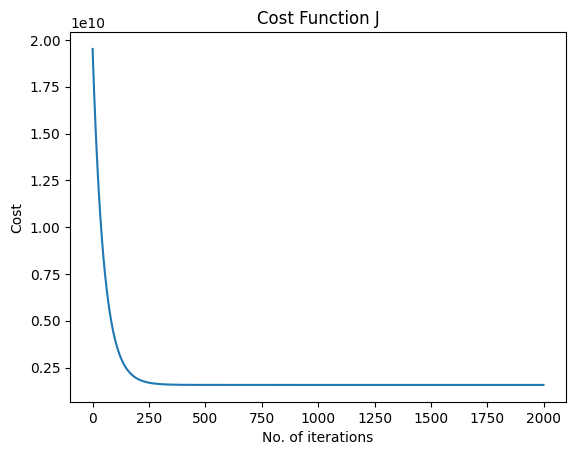

In [8]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [9]:
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

In [10]:
def init():
  line.set_data([],[])
  annotation.set_text(' ')
  return line, annotation

In [13]:
def animate(i):
  x = np.linspace(-5, 20, 1000)
  y = past_thetas[i][1]*x + past_thetas[i][0]
  line.set_data(x, y)
  annotation.set_text('Cost = %.2f e10' %(past_costs[i]/10000000000))
  return line, annotation

In [14]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=300, interval=0, blit=True)

In [16]:
anim.save('animation.gif', writer='imagemagick',fps=30)


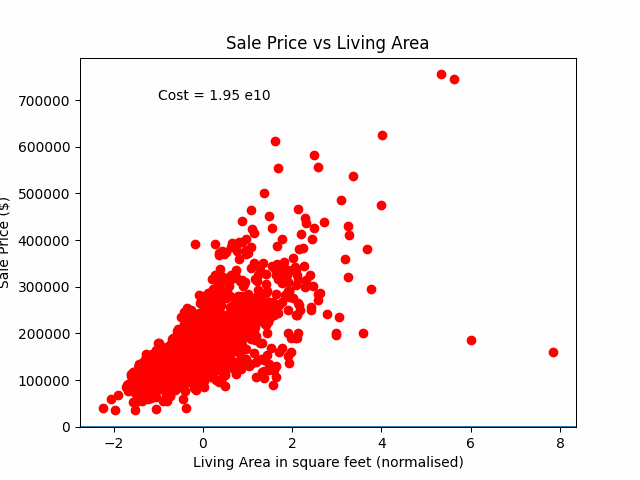

In [17]:
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open('animation.gif', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))